# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import pandas as pd
import re
from collections import defaultdict

# Load the dataset
reviews_file_path = '/content/barbie_imdb_reviews_cleaned.csv'
reviews_df = pd.read_csv(reviews_file_path)

def tokenize_text(review_text):
    """Tokenize the given text into lowercase words."""
    return re.findall(r'\b\w+\b', review_text.lower())

def create_ngrams(words_list, n):
    """Generate n-grams from the list of words."""
    return [tuple(words_list[i:i+n]) for i in range(len(words_list) - n + 1)]

def calculate_ngram_frequencies(reviews_dataset, n):
    """Calculate the frequency of each n-gram in the dataset."""
    ngram_frequency_dict = defaultdict(int)
    for review_text in reviews_dataset:
        words_list = tokenize_text(review_text)
        ngram_tuples = create_ngrams(words_list, n)
        for ngram in ngram_tuples:
            ngram_frequency_dict[ngram] += 1
    return dict(ngram_frequency_dict)

def compute_bigram_probabilities(reviews_dataset):
    """Compute the probability of each bigram in the dataset."""
    bigram_probability_dict = {}
    unigram_counts = calculate_ngram_frequencies(reviews_dataset, 1)
    bigram_counts = calculate_ngram_frequencies(reviews_dataset, 2)
    for bigram, count in bigram_counts.items():
        w1 = bigram[0]
        bigram_probability_dict[bigram] = count / unigram_counts[(w1,)]
    return bigram_probability_dict

def find_noun_phrases(review_text):
    """Find 'noun phrases' in the review text. This is a simplified approach."""
    extracted_noun_phrases = re.findall(r'\b\w+\s+\w+\b', review_text.lower())
    return extracted_noun_phrases

def compute_relative_noun_phrase_probabilities(reviews_dataset):
    """Calculate the relative probabilities of noun phrases across the dataset."""
    all_noun_phrases = []
    for review_text in reviews_dataset:
        extracted_noun_phrases = find_noun_phrases(review_text)
        all_noun_phrases.extend(extracted_noun_phrases)

    ngram_frequency_dict = defaultdict(int)
    for np in all_noun_phrases:
        ngram_frequency_dict[np] += 1

    max_frequency = max(ngram_frequency_dict.values(), default=0)
    noun_phrase_probabilities = {np: count / max_frequency for np, count in ngram_frequency_dict.items()}
    return noun_phrase_probabilities

def display_noun_phrase_probabilities(noun_phrase_probabilities):
    """Display the noun phrases and their relative probabilities."""
    print("Noun Phrase\tRelative Probability")
    for np, prob in noun_phrase_probabilities.items():
        print(f"{np}\t{prob}")

# Task 1: Count the frequency of all the N-grams (N=3)
print("Task 1: N-gram counts for N=3")
ngram_frequency_dict = calculate_ngram_frequencies(reviews_df['Review_clean'], 3)
for ngram, count in ngram_frequency_dict.items():
    print(f"{ngram}: {count}")

# Task 2: Calculate probabilities for all bigrams in the dataset
print("\nTask 2: Bigram probabilities")
bigram_probability_dict = compute_bigram_probabilities(reviews_df['Review_clean'])
for bigram, probability in bigram_probability_dict.items():
    print(f"{bigram}: {probability}")

# Task 3: Extract noun phrases and calculate relative probabilities
print("\nTask 3: Relative probabilities of noun phrases")
noun_phrase_probabilities = compute_relative_noun_phrase_probabilities(reviews_df['Review_clean'])
display_noun_phrase_probabilities(noun_phrase_probabilities)


Streaming output truncated to the last 5000 lines.
incomplet consum	0.004405286343612335
girl daili	0.004405286343612335
dryshow drink	0.004405286343612335
nonexist tea	0.004405286343612335
everyth appear	0.004405286343612335
perfect perfect	0.004405286343612335
world unless	0.004405286343612335
your boyfriend	0.004405286343612335
varieti form	0.004405286343612335
doom exist	0.004405286343612335
barbi slipstream	0.004405286343612335
experi recur	0.004405286343612335
frustrat get	0.004405286343612335
precis nowher	0.004405286343612335
time object	0.004405286343612335
call desirethen	0.004405286343612335
thing start	0.004405286343612335
start malfunct	0.004405286343612335
visit kate	0.004405286343612335
get determin	0.004405286343612335
world connect	0.00881057268722467
disillus mattel	0.004405286343612335
employe play	0.004405286343612335
whose neg	0.004405286343612335
channel disinterest	0.004405286343612335
daughter ariana	0.004405286343612335
greenblatt upset	0.004405286343612335
equ

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
import pandas as pd
import math
from collections import defaultdict

# Load the dataset
reviews_csv_path = '/content/barbie_imdb_reviews_cleaned.csv'
reviews_dataframe = pd.read_csv(reviews_csv_path)

def split_into_tokens(text):
    """Split the given text into lowercase words (tokens)."""
    return text.lower().split()

def compute_term_frequencies(review_texts):
    """Compute term frequencies for each document."""
    term_frequencies = defaultdict(dict)
    for doc_index, text in enumerate(review_texts):
        tokens = split_into_tokens(text)
        token_counts = defaultdict(int)
        for token in tokens:
            token_counts[token] += 1
        max_frequency_in_document = max(token_counts.values())
        for token, count in token_counts.items():
            term_frequencies[doc_index][token] = count / max_frequency_in_document
    return term_frequencies

def compute_inverse_document_frequencies(review_texts):
    """Compute inverse document frequencies for each term across all documents."""
    inverse_document_frequencies = defaultdict(lambda: 0)
    total_documents = len(review_texts)
    for text in review_texts:
        seen_tokens = set()
        for token in split_into_tokens(text):
            if token not in seen_tokens:
                inverse_document_frequencies[token] += 1
                seen_tokens.add(token)
    for token, doc_freq in inverse_document_frequencies.items():
        inverse_document_frequencies[token] = math.log(total_documents / (1 + doc_freq))  # Adding 1 to avoid division by zero
    return inverse_document_frequencies

# Start to build the documents-terms weights (tf * idf) matrix.
def compute_tfidf_scores(term_frequencies, inverse_document_frequencies):
    """Calculate TF-IDF scores for each term in each document."""
    tfidf_scores = defaultdict(dict)
    for doc_id, token_scores in term_frequencies.items():
        for token, score in token_scores.items():
            tfidf_scores[doc_id][token] = score * inverse_document_frequencies[token]
    return tfidf_scores

def calculate_cosine_similarity(vector1, vector2):
    """Calculate cosine similarity between two vectors."""
    dot_product = sum([vector1[token] * vector2.get(token, 0) for token in vector1])
    norm_vector1 = math.sqrt(sum([value**2 for value in vector1.values()]))
    norm_vector2 = math.sqrt(sum([value**2 for value in vector2.values()]))
    if norm_vector1 == 0 or norm_vector2 == 0:
        return 0  # Avoid division by zero
    return dot_product / (norm_vector1 * norm_vector2)

# Start to rank the documents with respect to a query using cosine similarity.
def rank_documents_by_query(search_query, tfidf_scores):
    """Rank documents based on their cosine similarity to a query."""
    tokens_in_query = split_into_tokens(search_query)
    query_term_frequencies = defaultdict(int)
    for token in tokens_in_query:
        query_term_frequencies[token] += 1
    max_frequency_in_query = max(query_term_frequencies.values())
    query_tf = {token: (count / max_frequency_in_query) for token, count in query_term_frequencies.items()}
    query_inverse_doc_frequencies = {token: inverse_document_frequencies.get(token, 0) for token in tokens_in_query}
    query_tfidf_scores = {token: query_tf[token] * query_inverse_doc_frequencies[token] for token in tokens_in_query}

    document_similarities = []
    for doc_id, doc_tfidf in tfidf_scores.items():
        similarity_score = calculate_cosine_similarity(doc_tfidf, query_tfidf_scores)
        document_similarities.append((doc_id, similarity_score))
    document_similarities.sort(key=lambda x: x[1], reverse=True)  # Sort by similarity
    return document_similarities

# Execution
review_texts = reviews_dataframe['Review_clean'].tolist()
term_frequencies = compute_term_frequencies(review_texts)
inverse_document_frequencies = compute_inverse_document_frequencies(review_texts)
tfidf_scores = compute_tfidf_scores(term_frequencies, inverse_document_frequencies)

# Define a query for demonstration
search_query = "An Outstanding movie with a haunting performance and best character development"
documents_ranked_by_similarity = rank_documents_by_query(search_query, tfidf_scores)

# Print top 5 similar documents
print("Top 5 similar documents to the query:")
for doc_id, similarity_score in documents_ranked_by_similarity[:5]:
    print(f"Document ID: {doc_id}, Similarity: {similarity_score}")


Top 5 similar documents to the query:
Document ID: 645, Similarity: 0.12899127535267083
Document ID: 462, Similarity: 0.10933864220541195
Document ID: 630, Similarity: 0.09461188954190773
Document ID: 181, Similarity: 0.0903315051179372
Document ID: 397, Similarity: 0.08503199247881305


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
pip install gensim matplotlib


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


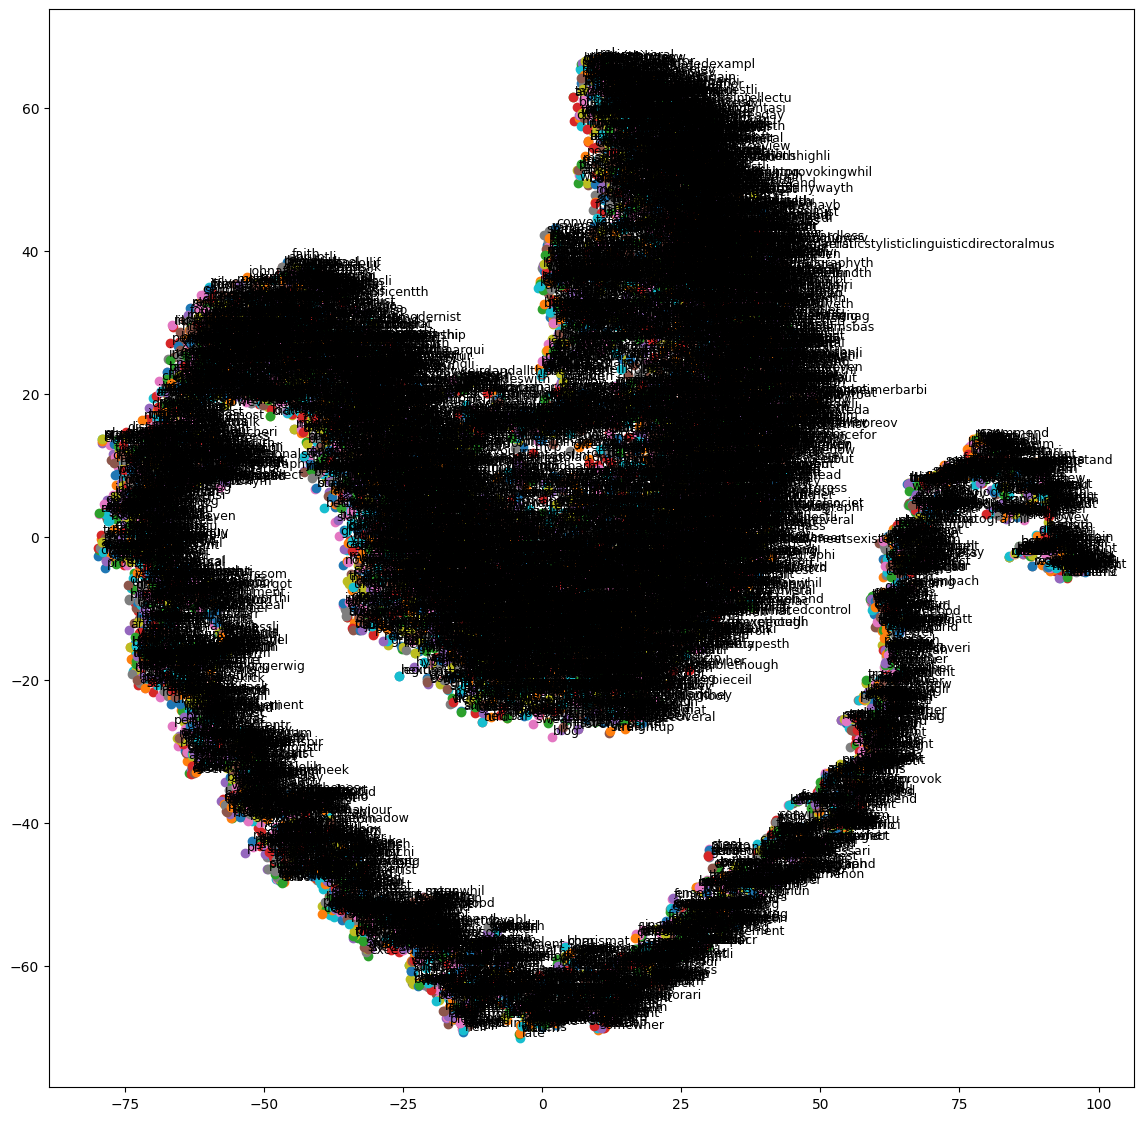

In [ ]:
import pandas as pd
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Download NLTK data for tokenization
nltk.download('punkt')

# Load your dataset
dataset_path = '/content/barbie_imdb_reviews_cleaned.csv'
reviews_data = pd.read_csv(dataset_path)

# Tokenize reviews
tokenized_reviews = reviews_data['Review_clean'].apply(word_tokenize).tolist()

# (1) Start to train a 300-dimension word embedding
embedding_model = Word2Vec(sentences=tokenized_reviews, vector_size=300, window=5, min_count=1, workers=4)
embedding_model.save("word_embeddings_model.model")

# Select words and their vectors
unique_words = list(embedding_model.wv.index_to_key)
vectors = [embedding_model.wv[word] for word in unique_words]

# Convert the list of vectors into a 2D NumPy array for TSNE compatibility
vectors_array = np.array(vectors)

# (2) Start to visualize the word embedding model
tsne_model = TSNE(n_components=2, random_state=42)
reduced_vectors = tsne_model.fit_transform(vectors_array)

# Visualization
plt.figure(figsize=(14, 14))
for i, word in enumerate(unique_words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.text(reduced_vectors[i, 0] + 0.3, reduced_vectors[i, 1] + 0.3, word, fontsize=9)
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
#Github link - https://github.com/joshnajose/INFO5731/blob/main/annotated_reviews.csv

# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# I found implementing the TF-IDF algorithm to calculate the importance of words in documents and using cosine similarity to measure the similarity between documents bit challenging.
# I liked working on creating the word-embedding model as it gave an overview of how words are represented with dense vectors.
# The time was sufficient to work on the project.
